In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from statsmodels.tsa.stattools import adfuller

In [7]:
# Dataset de entrenamiento
df_Nizanda = pd.read_csv('./Datasets/Nizanda_T1.csv')
df_Nizanda

,Day,Month,Year,Hour,Barometer,Temp C,High Temp C,Low Temp C,Hum %,Dew Point C,...,Wind Run,High Wind Speed m/s,High Wind Direction,Wind Chill C,Heat Index C,THW Index C,Rain mm,Rain Rate mm/h,ET mm,Date
0,1,1,2017,0,754.7,25.2,25.7,24.9,84.0,22.3,...,3.1,11.2,NW,25.2,27.3,27.3,0.0,0.0,NaN,2017-01-01 00:00:00
1,1,1,2017,1,754.5,24.6,24.9,24.4,86.0,22.1,...,3.1,11.2,WNW,24.6,26.5,26.5,0.0,0.0,NaN,2017-01-01 01:00:00
2,1,1,2017,2,754.2,24.5,24.6,24.4,81.0,21.0,...,2.7,10.7,WNW,24.5,26.2,26.2,0.0,0.0,NaN,2017-01-01 02:00:00
3,1,1,2017,3,753.9,24.4,24.6,24.2,84.0,21.5,...,3.1,10.7,WNW,24.4,26.1,26.1,0.0,0.0,NaN,2017-01-01 03:00:00
4,1,1,2017,4,753.7,24.1,24.3,24.1,86.0,21.6,...,3.1,12.5,WNW,24.1,25.9,25.9,0.0,0.0,NaN,2017-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17406,31,12,2018,19,754.6,26.6,26.8,26.4,73.0,21.4,...,2.2,9.4,N,26.6,28.4,28.4,0.0,0.0,NaN,2018-12-31 19:00:00
17407,31,12,2018,20,754.8,26.2,26.4,26.0,75.0,21.4,...,2.2,9.8,WNW,26.2,27.9,27.9,0.0,0.0,NaN,2018-12-31 20:00:00
17408,31,12,2018,21,755.0,25.9,26.0,25.8,74.0,20.9,...,2.2,8.5,N,25.9,27.4,27.4,0.0,0.0,NaN,2018-12-31 21:00:00
17409,31,12,2018,22,755.4,25.7,25.8,25.5,75.0,20.9,...,1.8,7.1,NE,25.7,27.2,27.2,0.0,0.0,NaN,2018-12-31 22:00:00


In [8]:
df_Prueba = pd.read_csv('./Datasets/Nizanda_22_Prueba.csv')
df_Prueba

,Day,Month,Year,Hour,Barometer,Temp C,High Temp C,Low Temp C,Hum %,Dew Point C,...,Wind Run,High Wind Speed m/s,High Wind Direction,Wind Chill C,Heat Index C,THW Index C,Rain mm,Rain Rate mm/h,ET mm,Date
0,1,1,2022,0,758.9,25.4,25.6,25.3,88.0,23.3,...,1.79,5.4,S,25.4,27.6,27.6,0.0,0.0,0.03,2022-01-01 00:00:00
1,1,1,2022,1,758.7,25.0,25.4,25.0,89.0,23.1,...,1.79,4.9,S,25.0,27.0,27.0,0.0,0.0,0.03,2022-01-01 01:00:00
2,1,1,2022,2,758.2,24.5,25.1,24.5,89.0,22.6,...,1.34,4.5,SSE,24.5,26.2,26.2,0.0,0.0,0.03,2022-01-01 02:00:00
3,1,1,2022,3,757.9,23.8,24.5,23.8,92.0,22.5,...,0.89,4.0,SSW,23.8,25.4,25.4,0.0,0.0,0.03,2022-01-01 03:00:00
4,1,1,2022,4,758.0,23.8,23.9,23.7,91.0,22.2,...,0.89,4.5,SSE,23.8,25.3,25.3,0.0,0.0,0.00,2022-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31,12,2022,19,759.2,28.7,29.6,28.7,61.0,20.5,...,2.24,8.5,W,28.7,30.7,30.7,0.0,0.0,0.08,2022-12-31 19:00:00
8756,31,12,2022,20,759.6,28.3,28.8,28.3,63.0,20.6,...,1.79,7.6,ENE,28.3,30.3,30.3,0.0,0.0,0.08,2022-12-31 20:00:00
8757,31,12,2022,21,760.1,27.7,28.3,27.7,67.0,21.0,...,1.79,6.7,NW,27.7,29.9,29.9,0.0,0.0,0.08,2022-12-31 21:00:00
8758,31,12,2022,22,760.5,27.2,27.8,27.2,73.0,21.9,...,2.24,8.5,NE,27.2,29.7,29.7,0.0,0.0,0.05,2022-12-31 22:00:00


<Axes: xlabel='Month', ylabel='High Wind Speed m/s'>

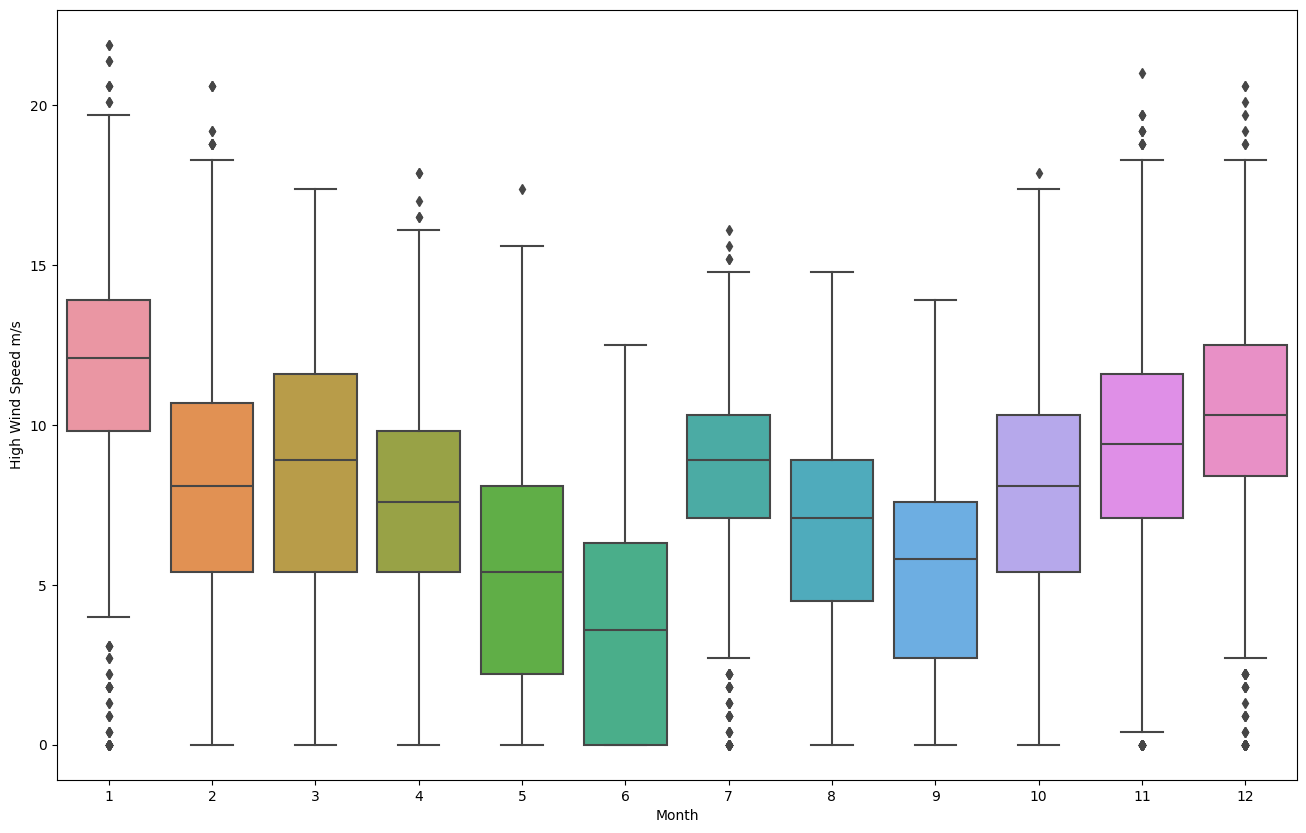

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(16, 10), sharex=True)
sns.boxplot(data=df_Nizanda, x='Month', y='High Wind Speed m/s')

<Axes: xlabel='Month', ylabel='High Wind Speed m/s'>

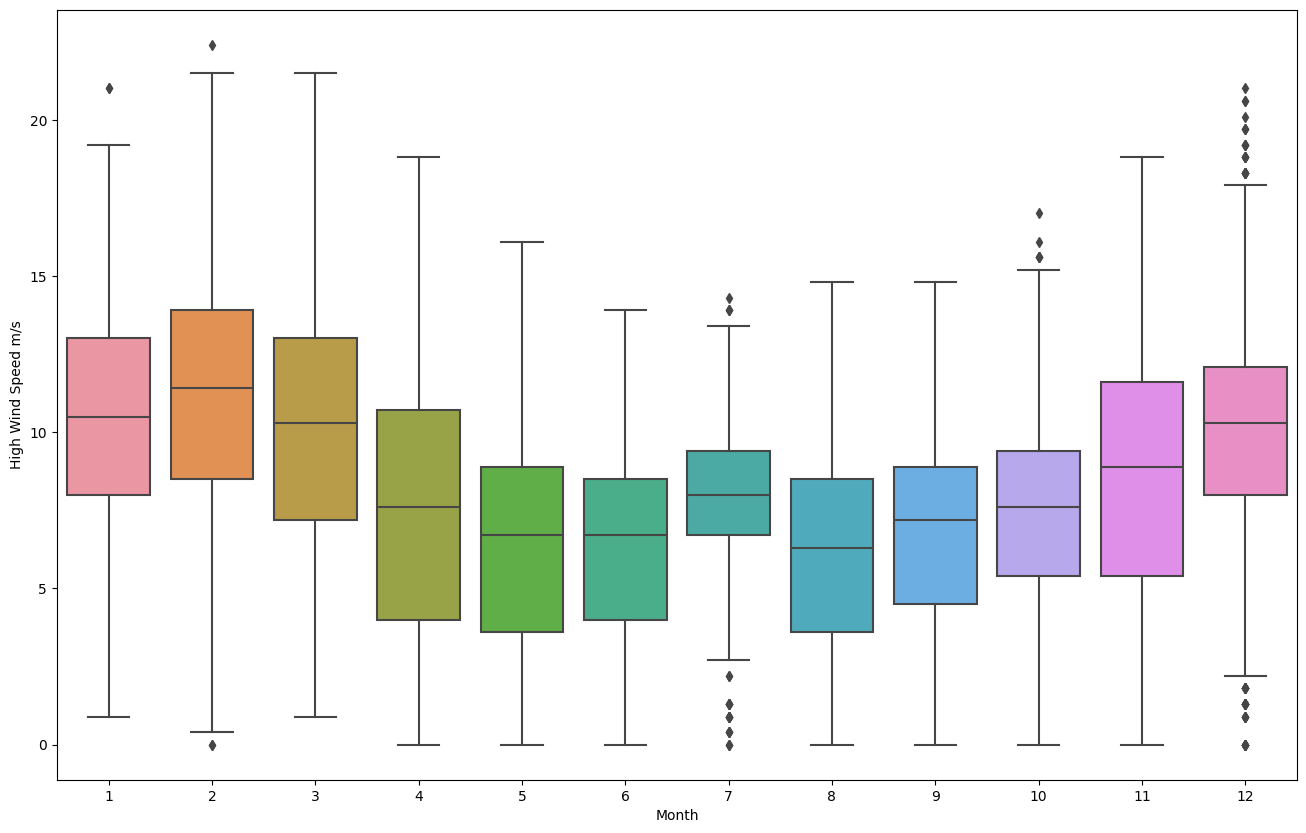

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(16, 10), sharex=True)
sns.boxplot(data=df_Prueba, x='Month', y='High Wind Speed m/s')

In [31]:
df_Nizanda['High Wind Speed m/s'].dropna()
serie = df_Nizanda['High Wind Speed m/s'].values
serie

array([11.2, 11.2, 10.7, ...,  8.5,  7.1,  9.4])

In [32]:
# Realizando la prueba Dickey-Fuller
result = adfuller(serie)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -9.956645795133745
p-value: 2.434260713264511e-17
Critial Values:
   1%, -3.430726613317102
Critial Values:
   5%, -2.861706448459203
Critial Values:
   10%, -2.566858596208272


In [13]:
serie2 = df_Prueba['High Wind Speed m/s'].values
serie2

array([5.4, 4.9, 4.5, ..., 6.7, 8.5, 7.6])

In [14]:
# Realizando la prueba Dickey-Fuller
result = adfuller(serie2)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -10.131968972062447
p-value: 8.869286761625859e-18
Critial Values:
   1%, -3.4310995387302516
Critial Values:
   5%, -2.861871246211382
Critial Values:
   10%, -2.566946317391388


In [15]:
q = 8.869286761625859e-18
cero = 0

if q < 0.0005:
    print('True')
else:
    print('false')

True


In [17]:
serie_ = np.concatenate((serie, serie2), axis = 0)
serie_

array([11.2, 11.2, 10.7, ...,  6.7,  8.5,  7.6])

In [18]:
# Realizando la prueba Dickey-Fuller
result = adfuller(serie_)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -12.853272461089846
p-value: 5.297035216851736e-24
Critial Values:
   1%, -3.430600371070829
Critial Values:
   5%, -2.861650656642184
Critial Values:
   10%, -2.5668288992587573


In [20]:
q = 5.297035216851736e-24
cero = 0

if q < 0.05:
    print('True')
else:
    print('false')

True


In [26]:
result = adfuller(serie_)
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


In [28]:
adfuller_test = adfuller(serie_)
p_value = adfuller_test[1]

In [30]:
p_value < 0.05

True